In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from numpy.polynomial import Polynomial
from structural_data.mech_prop_db import ultimate_tensile_strength_w,ultimate_tensile_strength,minimum_uniform_elongation
from matplotlib import rc
import warnings
warnings.filterwarnings("ignore")
rc('font',**{'family':'serif','serif':['Times'],'weight': 'bold'})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = "".join([r"\usepackage{newtxtext,newtxmath}",r"\boldmath"])
from matplotlib.ticker import AutoMinorLocator


#Constants for Unit Conversion
temperature = np.linspace(293.15,1300,100)
KSI_TO_MPA = 6.89476
NCM2_TO_MPA = 0.01
KGMM2_TO_MPA = 9.80665

#Read in various data sets and convert units

#ITER
_,iter_w_df_uts= ultimate_tensile_strength_w(temperature,return_data= True)
iter_wl10_df_uts = ultimate_tensile_strength(temperature)
iter_wl10_df_uts= pd.DataFrame(iter_wl10_df_uts,index = temperature,columns = ['UTS [MPa]'])

iter_w_min_unif_elongation = minimum_uniform_elongation(temperature)
iter_w_min_unif_elongation = pd.DataFrame(iter_w_min_unif_elongation,index = temperature,columns = ['Min Unif Elongation [%]'])

iter_w_df_uts = pd.read_csv('structural_data/w_iter_uts',index_col= None,header = 0)

wl10_iter_uts = ultimate_tensile_strength(temperature)

#Younger + Write
younger_df_unirradiated = pd.read_csv('structural_data/younger_wright_data1.csv',header = 0,index_col = 0)
younger_df_irradiated = pd.read_csv('structural_data/younger_wright_data2.csv',header = 0,index_col = 0)

younger_df_unirradiated['Yield Strength [MPa]'] = NCM2_TO_MPA*younger_df_unirradiated['Yield Strength [N/cm^2] e3'].astype(float)*1e3
younger_df_unirradiated['UTS [MPa]'] = NCM2_TO_MPA*younger_df_unirradiated['Ultimate Tensile Strength [N/cm^2] e3'].astype(float)*1e3
younger_df_unirradiated['Test Temperature [C]'] = younger_df_unirradiated['Test Temperature [K]'].astype(float) + 273.15


younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()]  \
    =younger_df_irradiated['Brittle Fracture Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()] 

younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()] \
    = younger_df_irradiated['Lower Yield Point [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()] 

younger_df_irradiated['Yield Strength [MPa]'] = NCM2_TO_MPA*younger_df_irradiated['Yield Strength [N/cm^2] e3'].astype(float)*1e3
younger_df_irradiated['UTS [MPa]'] = NCM2_TO_MPA*younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].astype(float)*1e3

younger_df_irradiated['Test Temperature [C]'] = younger_df_irradiated['Test Temperature [K]'].astype(float) + 273.15

#Mabouchi
mabuchi_wdf = pd.read_csv('structural_data/mabuchi_w.csv')
mabuchi_wL10df = pd.read_csv('structural_data/mabuchi_wl10.csv')

#Nogami
nogami_df = pd.read_csv('structural_data/nogami_data.csv',index_col = 0)

#Haibany
habainy_df = pd.read_csv('structural_data/habainy.csv')

#Yin
yin_df = pd.read_csv('structural_data/yin_data2020.csv').iloc[8:]
for column in yin_df.columns:
    if column not in ['Materials']:
        yin_df[column].iloc[yin_df[column] == '�'] = np.nan
        yin_df[column] = yin_df[column].astype(float)

#Miyazawa
miyazawa_df = pd.read_csv('structural_data/miyazawa_data2020.csv')
for column in miyazawa_df.columns:
    if column not in ['Sample ID','Material type']:
        miyazawa_df[column].iloc[miyazawa_df[column] == '�'] = np.nan
        miyazawa_df[column] = miyazawa_df[column].astype(float)




### Uniform Elongation

Uniform elongation is another important material property, which for our purposes indicates how "ductile" a material is. Informed by engineering design codes, we assume that a uniform elongation measured below 2% corresponds to a non-ductile material. Tungsten and it's alloys are famously brittle, which makes their use as structural materials dangerous as failure can occur suddenly and without warning.

The below scatter shows uniform elongation scatter plotted as a function of temperature for various tungsten alloys, produced in a variety of ways. Even more so then the ultimate tensile strength, there is a broad range of uniform elongation at each temperature across alloys.

Index(['UTS [MPa] W Plate (H)', 'UTS [MPa] K-W Plate (H)',
       'UTS [MPa] W3%Re Plate (H)', 'UTS [MPa] K-W3%Re Plate (H)',
       'UTS [MPa] W3%Re Plate (L)', 'UTS [MPa] K-W3%Re Plate (L)',
       'UTS [MPa] W3%Re-1%La2O3 Plate (L)', 'UE [%] W Plate (H)',
       'UE [%] K-W Plate (H)', 'UE [%] W3%Re Plate (H)',
       'UE [%] K-W3%Re Plate (H)', 'UE [%] W3%Re Plate (L)',
       'UE [%] K-W3%Re Plate (L)', 'UE [%] W3%Re-1%La2O3 Plate (L)',
       'TE [%] W Plate (H)', 'TE [%] K-W Plate (H)', 'TE [%] W3%Re Plate (H)',
       'TE [%] W3%Re Plate (L)', 'TE [%] K-W3%Re Plate (L)',
       'TE [%] K-W3%Re Plate (H)', 'TE [%] W3%Re-1%La2O3 Plate (L)'],
      dtype='object')


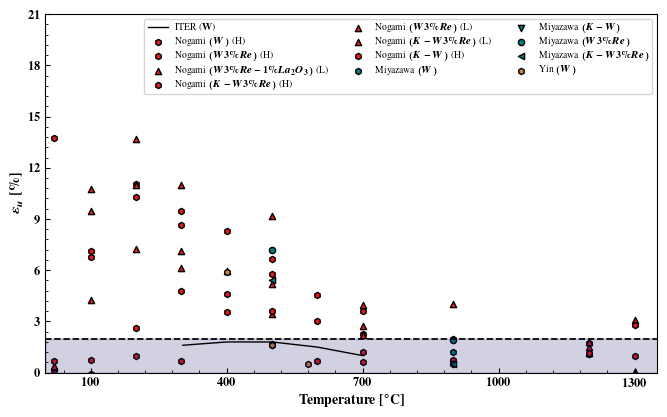

In [11]:


MARKER_SIZE = 20
ALPHA = 1.0
fig,ax = plt.subplots(figsize = (6.5,4))

ax.set_xlabel(r'\textbf{Temperature} \textbf{[}$^\circ$\textbf{C]}',fontsize = 10)
ax.set_ylabel(r'$\varepsilon_u \ [\%]$',fontsize  = 10)
ax.tick_params('both',labelsize = 9,direction = 'in',which = 'both')

#ITER Data

ax.plot(temperature,iter_w_min_unif_elongation,linewidth = 1.,color = 'k',
        label = 'ITER ($\mathbf{W}$)')


#Nogami

alloys = {'UE [%] W Plate (H)':('Nogami $(W)$ (H)','h'),
          'UE [%] W3%Re Plate (H)':(r'Nogami  $(W3\%Re)$ (H)','h'),
          'UE [%] W3%Re-1%La2O3 Plate (L)':(r'Nogami $(W3\%Re-1\%La_2O_3)$ (L)','^'),
          'UE [%] K-W3%Re Plate (H)':(r'Nogami $(K-W3\%Re)$ (H)','h'),
          'UE [%] W3%Re Plate (L)':(r'Nogami $(W3\%Re)$ (L)','^'),
          'UE [%] K-W3%Re Plate (L)': (r'Nogami $(K-W3\%Re)$ (L)','^'),
          'UE [%] K-W Plate (H)': (r'Nogami $(K-W)$ (H)','h'),
}

print(nogami_df.columns)
colors = plt.get_cmap('Set1')(np.arange(0,1,1/8))
i = 0
for column,(label,marker) in alloys.items():
        ax.scatter(nogami_df.index,nogami_df[column],
                edgecolor = 'k', facecolor = colors[i], s = MARKER_SIZE,label = label,
                marker = marker,alpha = ALPHA)
#Miyazawa

unirrad = np.isnan(miyazawa_df['dose [dpa]'].to_numpy())

alloys = {'Pure W (SR)':('Miyazawa $(W)$','h'),
          'K-doped W (SR)':('Miyazawa $(K-W)$','v'),
          'W-3%Re (SR)':('Miyazawa $(W3\%Re)$','o'),
          'K-doped W-3%Re (SR)':('Miyazawa $(K-W3\%Re)$','<')}

ai = miyazawa_df['Material type']== 'Pure W (SR)'

for column,(label,marker) in alloys.items():
        ai = miyazawa_df['Material type']== column    
        alloy_index = np.all(np.concatenate([unirrad[:,None],
                                        ai.to_numpy()[:,None]],axis = 1),
                        axis = 1)
        
        ax.scatter(miyazawa_df['Test temperature [C]'].loc[alloy_index],miyazawa_df['UE [%]'].loc[alloy_index],edgecolor = 'k',
                facecolor = (0,128/255,128/255),label = label,
                marker = marker,alpha = ALPHA,s = MARKER_SIZE)

#Yin data
unirrad = yin_df['Dose (dpa)'] == 0.0
ax.scatter(yin_df['Test temperature (oC)'].loc[unirrad],yin_df['Uniform elongation(%)'].loc[unirrad],edgecolor = 'k',
        facecolor = (205/255,133/255,63/255),label = 'Yin  $(W)$',
        marker = 'h',alpha = ALPHA,s = MARKER_SIZE)



ax.set_yticks(np.arange(0,24,3))
ax.set_xticks(np.arange(100,1400,300))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylim([0,21])
ax.legend(fontsize = 7,ncols = 3)
ax.axhline(2,linewidth = 1.25,linestyle = '--',color = 'k')
ax.set_xlim([0,1350])
ax.fill_between(np.linspace(*ax.get_xlim(),1000),0,2,color = (25/255,25/255,112/255,0.2))

fig.tight_layout(pad = 0.1)

### The Effect of Material Production Route

The effect of material production route is highlighted here by the differences in uniform elongation $\varepsilon_u$, especially for the K-doped 3% Re alloy. This is especially critical as the difference between the highly deformed (H) and less deformed (L) materials mean the material is either above or below the brittle material limit of 2%. While the (L) material is more ductile, it's ultimate tensile stress is greater, as shown in the [uts_data_exploration.ipynb](uts_data_exploration.ipynb).

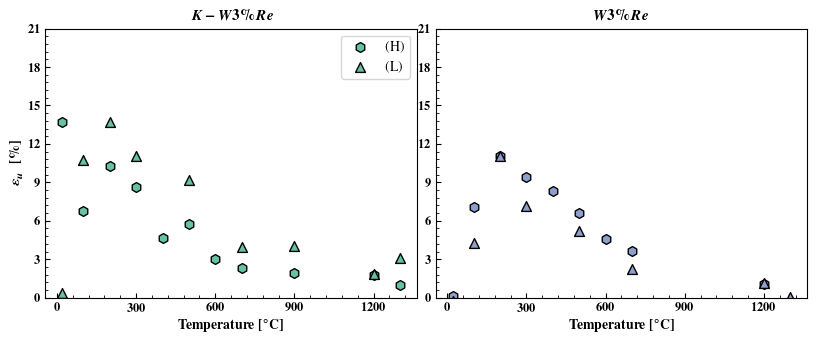

In [12]:
fig,axes = plt.subplots(ncols = 2,figsize = (8,3.25))
axes[0].set_ylabel(r'$\varepsilon_u$ \ \textbf{[\%]}',fontsize  = 10)
for ax in axes:
    ax.set_xlabel(r'\textbf{Temperature} \textbf{[}$^\circ$\textbf{C]}',fontsize = 10)
    ax.tick_params('both',labelsize = 9,direction = 'in',which = 'both')
    ax.set_xticks(np.arange(0,1300,300))
    ax.set_yticks(np.arange(0,24,3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_ylim([0,21])

alloys = [('UE [%] K-W3%Re Plate (H)','UE [%] K-W3%Re Plate (L)','$K-W3\%Re$',0.1),
           ('UE [%] W3%Re Plate (H)','UE [%] W3%Re Plate (L)','$W3\%Re$',0.3)]

for ax,(high,low,label,color) in zip(axes,alloys):
    ax.scatter(nogami_df.index,nogami_df[high],
                edgecolor = 'k', facecolor = plt.get_cmap('Set2')(color), s = 50,label = '(H)',
                marker = 'h',alpha = ALPHA)
    ax.scatter(nogami_df.index,nogami_df[low],
                edgecolor = 'k', facecolor = plt.get_cmap('Set2')(color), s = 50,label = '(L)',
                marker = '^',alpha = ALPHA)
    ax.set_title(label,fontsize = 11)

axes[0].legend(fontsize = 10)  
fig.tight_layout(pad = 0.1)